In [1]:
import pandas as pd
import yfinance as yf
from datetime import date

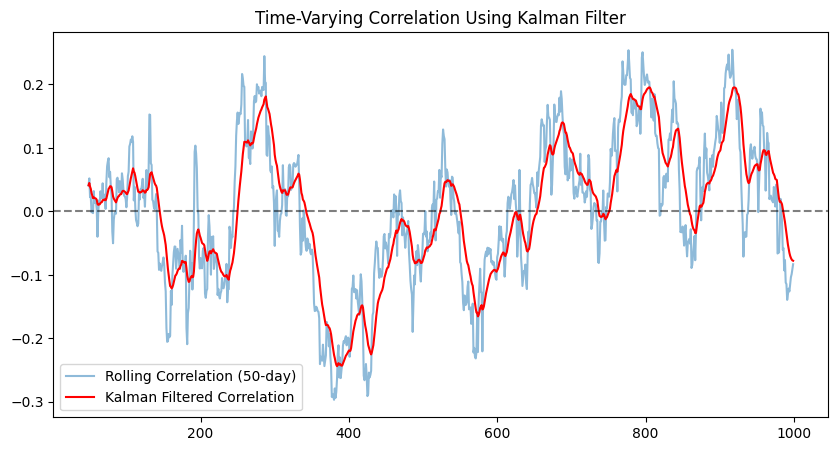

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from filterpy.kalman import KalmanFilter

# Generate synthetic return data
np.random.seed(42)
n_obs = 1000
returns = pd.DataFrame(np.random.randn(n_obs, 2) * 0.01, columns=["Asset1", "Asset2"])

# Compute initial correlation estimate using a rolling window
initial_corr = returns["Asset1"].rolling(window=50).corr(returns["Asset2"]).dropna()

# Kalman Filter setup
kf = KalmanFilter(dim_x=1, dim_z=1)  # State: correlation, Observation: observed correlation
kf.x = np.array([[initial_corr.iloc[0]]])  # Initial state estimate
kf.F = np.array([[1]])  # State transition matrix (correlation follows a random walk)
kf.H = np.array([[1]])  # Observation model (directly observed)
kf.P *= 0.01  # Initial covariance
kf.R *= 0.01  # Observation noise covariance
kf.Q *= 0.0001  # Process noise covariance (controls smoothness)

# Apply Kalman Filter
filtered_corr = []
for obs in initial_corr:
    kf.predict()
    kf.update(np.array([[obs]]))
    filtered_corr.append(kf.x[0, 0])

# Convert to pandas series for plotting
filtered_corr = pd.Series(filtered_corr, index=initial_corr.index)

# Plot results
plt.figure(figsize=(10, 5))
plt.plot(initial_corr, label="Rolling Correlation (50-day)", alpha=0.5)
plt.plot(filtered_corr, label="Kalman Filtered Correlation", color="red")
plt.axhline(0, linestyle="--", color="black", alpha=0.5)
plt.title("Time-Varying Correlation Using Kalman Filter")
plt.legend()
plt.show()
